In [9]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')

print('Column names:', data.columns)

print('No. of rows, columns:', data.shape)

nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023'],
      dtype='object')
No. of rows, columns: (396872, 68)
Unique number of countries: 266


In [12]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

print('Debt description:')
print(central_govt_debt['2022'].describe())

print('Expences description:')
print(military_exp['2022'].describe())

Shape of central_govt_debt: (266, 68)
Shape of military_exp: (266, 68)
Debt description:
count     13.000000
mean      67.569196
std       27.035236
min       34.521318
25%       43.322740
50%       61.417864
75%       83.682042
max      115.696632
Name: 2022, dtype: float64
Expences description:
count    195.000000
mean       2.000927
std        2.586828
min        0.069184
25%        1.049801
50%        1.508123
75%        2.278115
max       33.546573
Name: 2022, dtype: float64


Text(0.5, 1.0, 'Military expenditure (% of GDP) of 13 countries in 2022')

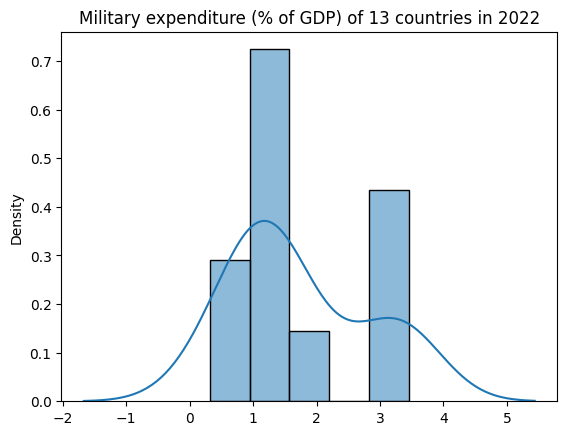

In [10]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_2022 = central_govt_debt['2022'].loc[~pd.isnull(central_govt_debt['2022'])]
military_exp_2022 = military_exp['2022'].loc[~pd.isnull(military_exp['2022'])]
data_to_plot = pd.concat((central_govt_debt_2022, military_exp_2022), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]
#data_to_plot.head()

import numpy as np
# from matplotlib import pyplot as plt
import seaborn as sns

# plt.figure(figsize=(5.5, 5.5))
# g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g = sns.histplot(np.array(data_to_plot.military_exp), kde=True, stat="density", kde_kws=dict(cut=3))
g.set_title('Military expenditure (% of GDP) of 13 countries in 2022')

Text(0.5, 1.0, 'Military expenditures & Debt of central governments in 2022')

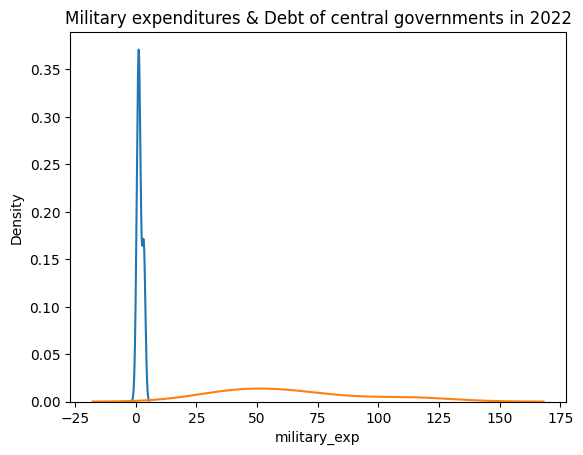

In [13]:
# plt.figure(figsize=(5.5, 5.5))
# g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g = sns.kdeplot(data_to_plot.military_exp)
sns.kdeplot(data_to_plot.central_govt_debt, ax=g)
g.set_title('Military expenditures & Debt of central governments in 2022')

Shape of data_us: (34, 2)


<Axes: title={'center': 'USA Debt of Federal Government during 1988-2023 (% of GDP)'}>

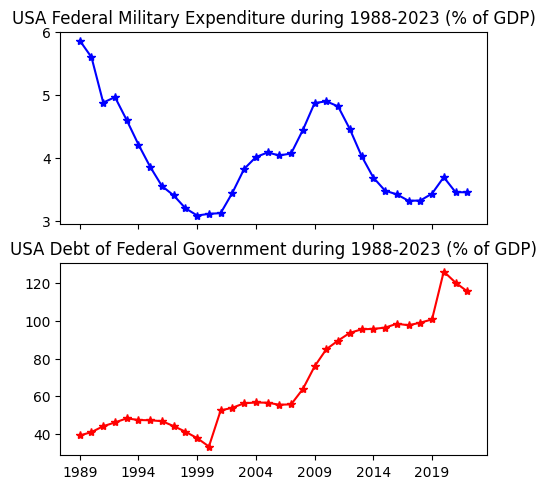

In [18]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2023')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
#data_us.head(10)

data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

# Two subplots, the axes array is 1-d
from matplotlib import pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('USA Federal Military Expenditure during 1988-2023 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('USA Debt of Federal Government during 1988-2023 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

Shape of data_us: (15, 2)


<Axes: title={'center': 'UA Debt of Federal Government during 1988-2023 (% of GDP)'}>

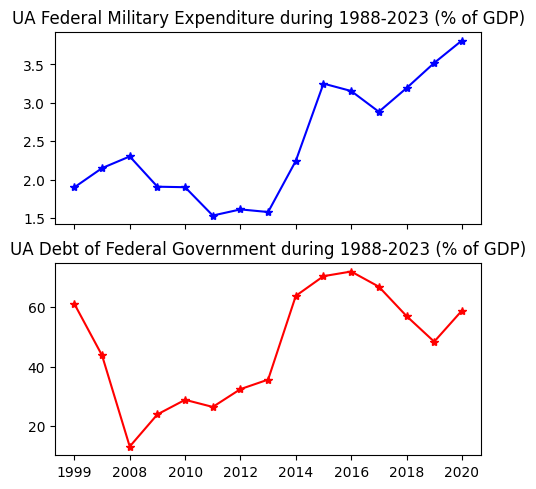

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='UKR', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='UKR', :].T

data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2023')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
#data_us.head(10)

data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

# Two subplots, the axes array is 1-d
from matplotlib import pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('UA Federal Military Expenditure during 1988-2023 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('UA Debt of Federal Government during 1988-2023 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

Shape of data_us: (22, 2)


<Axes: title={'center': 'RUS Debt of Federal Government during 1988-2023 (% of GDP)'}>

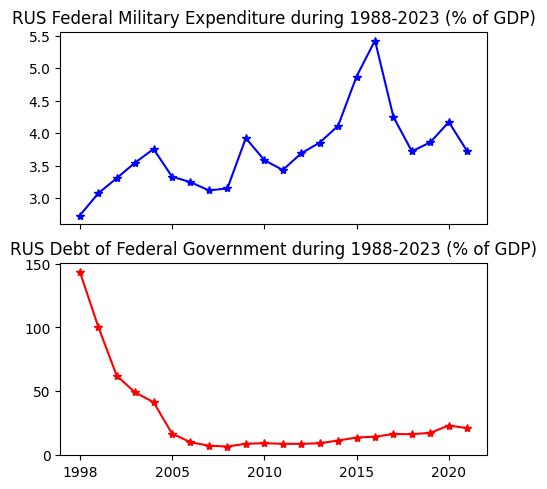

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('datasets/WDIData.csv')

central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='RUS', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='RUS', :].T

data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2023')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
#data_us.head(10)

data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

# Two subplots, the axes array is 1-d
from matplotlib import pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('RUS Federal Military Expenditure during 1988-2023 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('RUS Debt of Federal Government during 1988-2023 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])

Text(0.5, 0, 'Years')

<Figure size 550x550 with 0 Axes>

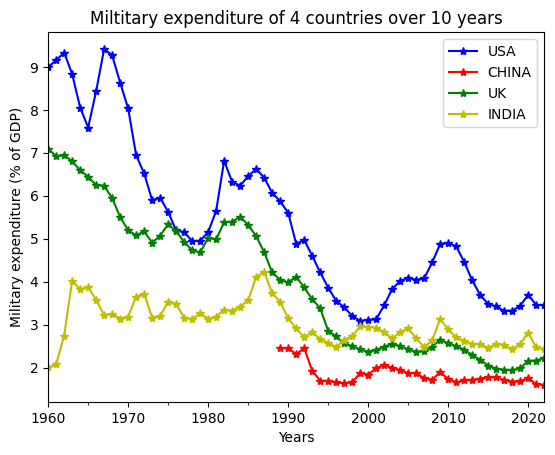

In [39]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')
#data.index = data['Country Code']

chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='CHN')].T

index0 = np.where(chn.index=='1960')[0][0]
index1 = np.where(chn.index=='2023')[0][0]

chn = chn.iloc[index0:index1+1, :]
chn.index = pd.to_datetime(chn.index)
chn.dropna(inplace=True)

usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='USA')].T
usa = usa.iloc[index0:index1+1,:]
usa.index = pd.to_datetime(usa.index)
usa.dropna(inplace=True)

ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='IND')].T
ind = ind.iloc[index0:index1+1,:]
ind.index = pd.to_datetime(ind.index)
ind.dropna(inplace=True)

gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & (data['Country Code']=='GBR')].T
gbr = gbr.iloc[index0:index1+1,:]
gbr.index = pd.to_datetime(gbr.index)
gbr.dropna(inplace=True)

plt.figure(figsize=(5.5, 5.5))
ax = usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r', ax=ax)
gbr.plot(linestyle='-', marker='*', color='g', ax=ax)
ind.plot(linestyle='-', marker='*', color='y', ax=ax)
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 4 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

<Figure size 550x550 with 0 Axes>

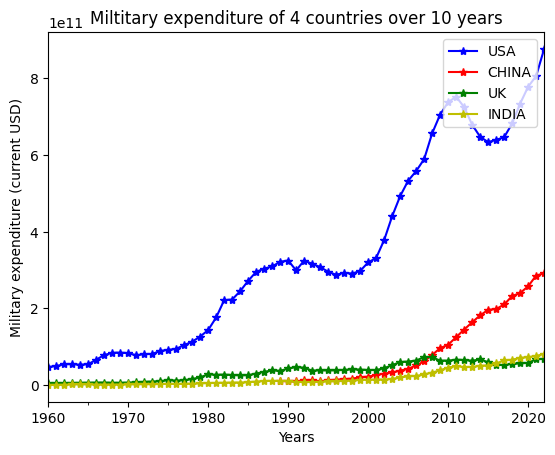

In [40]:
import pandas as pd

data = pd.read_csv('datasets/WDIData.csv')
#data.index = data['Country Code']

chn = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='CHN')].T

index0 = np.where(chn.index=='1960')[0][0]
index1 = np.where(chn.index=='2023')[0][0]

chn = chn.iloc[index0:index1+1, :]
chn.index = pd.to_datetime(chn.index)
chn.dropna(inplace=True)

usa = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='USA')].T
usa = usa.iloc[index0:index1+1,:]
usa.index = pd.to_datetime(usa.index)
usa.dropna(inplace=True)

ind = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='IND')].T
ind = ind.iloc[index0:index1+1,:]
ind.index = pd.to_datetime(ind.index)
ind.dropna(inplace=True)

gbr = data.loc[(data['Indicator Name']=='Military expenditure (current USD)') & (data['Country Code']=='GBR')].T
gbr = gbr.iloc[index0:index1+1,:]
gbr.index = pd.to_datetime(gbr.index)
gbr.dropna(inplace=True)

plt.figure(figsize=(5.5, 5.5))
ax = usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r', ax=ax)
gbr.plot(linestyle='-', marker='*', color='g', ax=ax)
ind.plot(linestyle='-', marker='*', color='y', ax=ax)
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 4 countries over 10 years')
plt.ylabel('Military expenditure (current USD)')
plt.xlabel('Years')

Trend model coefficient=-0.10066578104041131 and intercept=408.32199680151865


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(-5.0, 0, '2016-2'),
  Text(0.0, 0, '2020-4'),
  Text(5.0, 0, '2018-3'),
  Text(10.0, 0, '2021-7'),
  Text(15.0, 0, '2017-5'),
  Text(20.0, 0, '2016-8'),
  Text(25.0, 0, '2019-2'),
  Text(30.0, 0, '2017-7'),
  Text(35.0, 0, '')])

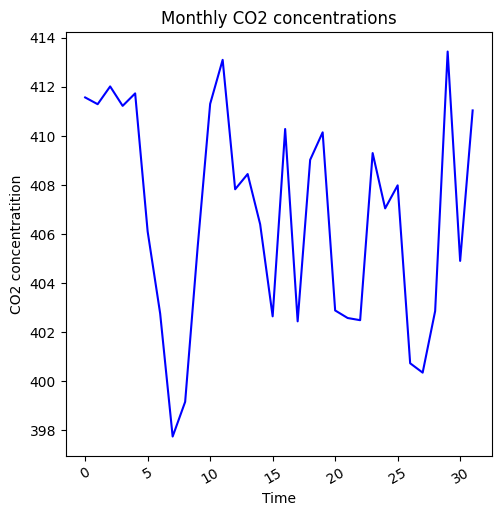

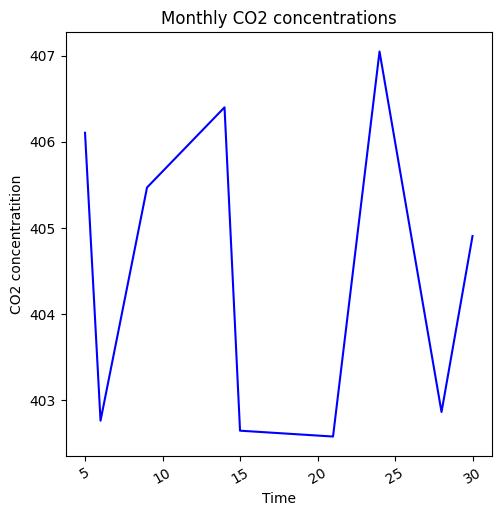

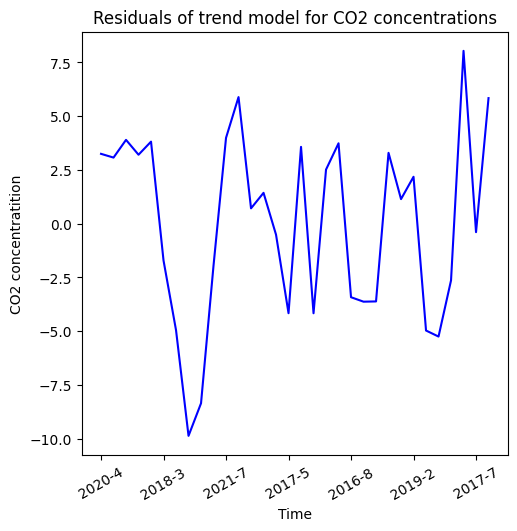

In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/XCO2data.csv', converters={'year': np.int32, 'month': np.int32})
#data.index = pd.to_datetime(dict(year=data['year'], month=data['month'], day = 1))

data = data.loc[(data['x'] == -179.875) & (data['y'] == -19.125)]
data = data.loc[(~pd.isnull(data['mean_xco2'])) & (~pd.isnull(data['year'])) & (~pd.isnull(data['month']))]
data.sort_values(['year', 'month'], ignore_index=True)

plt.figure(figsize=(5.5, 5.5))
data['mean_xco2'].plot(color='b')

plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

plt.figure(figsize=(5.5, 5.5))
data['mean_xco2'].loc[(data['year']==2017) | (data['year']==2018)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

from sklearn.linear_model import LinearRegression

trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.array(data.index).reshape((-1,1)), data['mean_xco2'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

residuals = np.array(data['mean_xco2']) - trend_model.predict(np.array(data.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
newIndex = data['year'].map(str) + '-' + data['month'].map(str)
pd.Series(data=residuals, index = newIndex).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

C:\Users\Nero\AppData\Local\Temp\ipykernel_9308\3649826118.py:8: FutureWarning: The provided callable <function mean at 0x000001674ACC6840> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  seasonal_sub_series_data = data.groupby(by=['year','Quarter'])['Residuals'].aggregate([np.mean, np.std])
C:\Users\Nero\AppData\Local\Temp\ipykernel_9308\3649826118.py:8: FutureWarning: The provided callable <function std at 0x000001674ACC6980> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  seasonal_sub_series_data = data.groupby(by=['year','Quarter'])['Residuals'].aggregate([np.mean, np.std])


(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0.0, 0, '(2015, Q1)'),
  Text(2.5, 0, ''),
  Text(5.0, 0, '(2017, Q1)'),
  Text(7.5, 0, ''),
  Text(10.0, 0, '(2018, Q3)'),
  Text(12.5, 0, ''),
  Text(15.0, 0, '(2020, Q2)'),
  Text(17.5, 0, ''),
  Text(20.0, 0, '')])

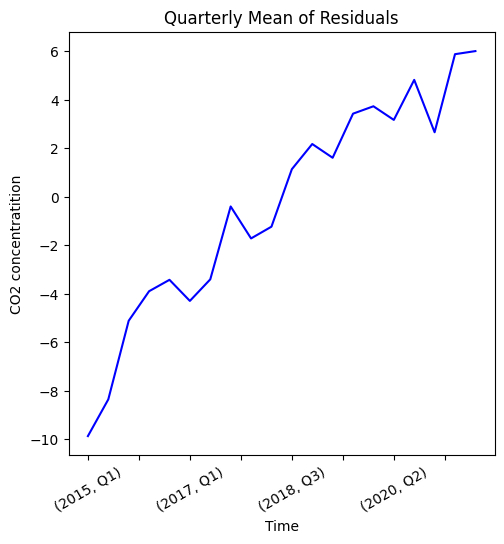

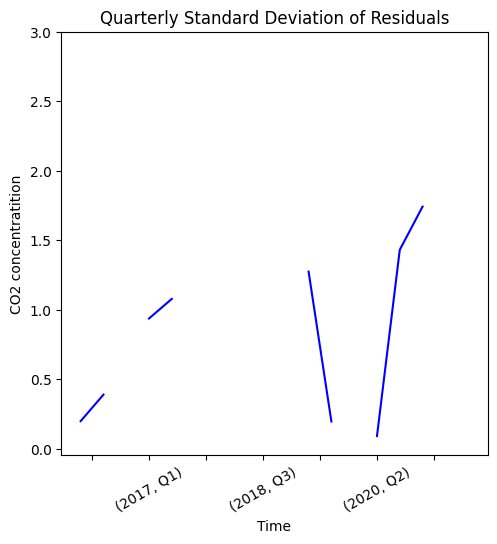

In [16]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1', 4: 'Q2', 5: 'Q2', 6: 'Q2',
7: 'Q3', 8: 'Q3', 9: 'Q3', 10: 'Q4', 11: 'Q4', 12: 'Q4'
}

data['Quarter'] = data['month'].map(lambda m: month_quarter_map.get(m))

seasonal_sub_series_data = data.groupby(by=['year','Quarter'])['Residuals'].aggregate([np.mean, np.std])

seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

#plot quarterly mean of residuals
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

#plot quarterly standard deviation of residuals
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30)

Text(0, 0.5, 'CO2 concentratition')

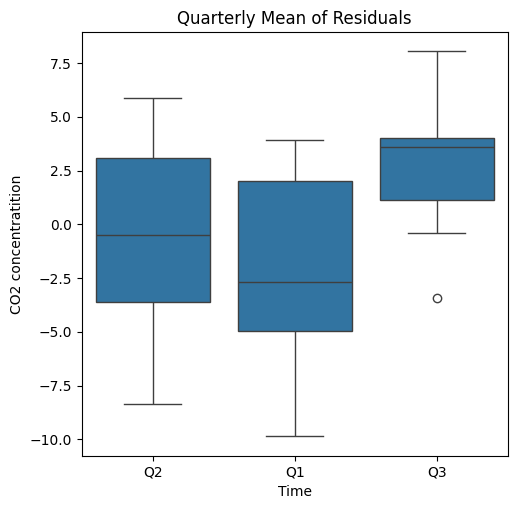

In [17]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Mean of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition')

Text(0.5, 0, 'Time index')

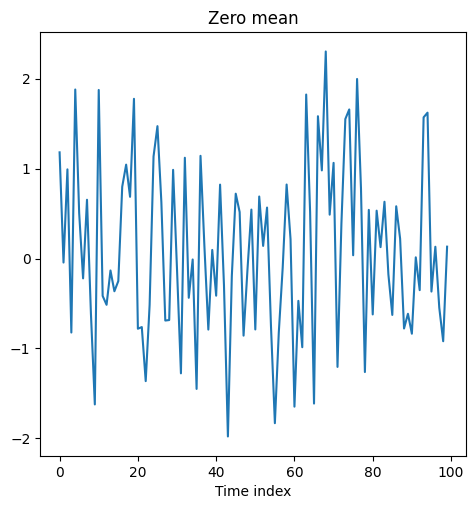

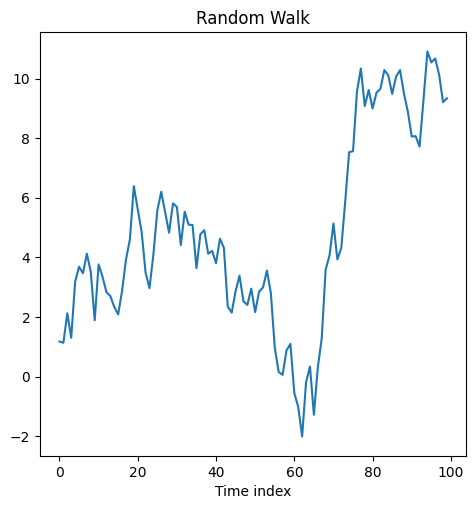

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(zero_mean_series)
g.set_title('Zero mean')
g.set_xlabel('Time index')

random_walk = np.cumsum(zero_mean_series)
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index')
# 36

C:\Users\Nero\AppData\Local\Temp\ipykernel_9668\2064139115.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_df.index = pd.to_datetime(djia_df.index)


Text(0, 0.5, 'Closing Value')

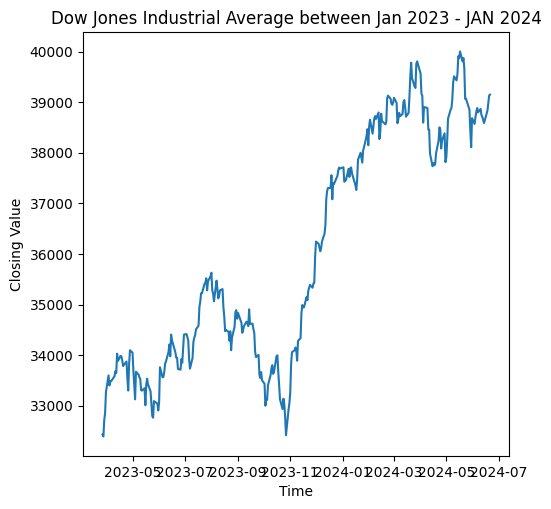

In [16]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

djia_df = pd.read_csv('datasets/DJI_HistoricalPrices.csv', index_col=0)
djia_df.index = pd.to_datetime(djia_df.index)
djia_df.columns = djia_df.columns.str.strip()
djia_df = djia_df.iloc[::-1]

plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(djia_df['Close'])
g.set_title('Dow Jones Industrial Average between Jan 2023 - JAN 2024')
g.set_xlabel('Time')
g.set_ylabel('Closing Value')

C:\Users\Nero\AppData\Local\Temp\ipykernel_9668\2619901224.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_df.index = pd.to_datetime(djia_df.index)
C:\Users\Nero\AppData\Local\Temp\ipykernel_9668\2619901224.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(lag, rotation=90)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30')]

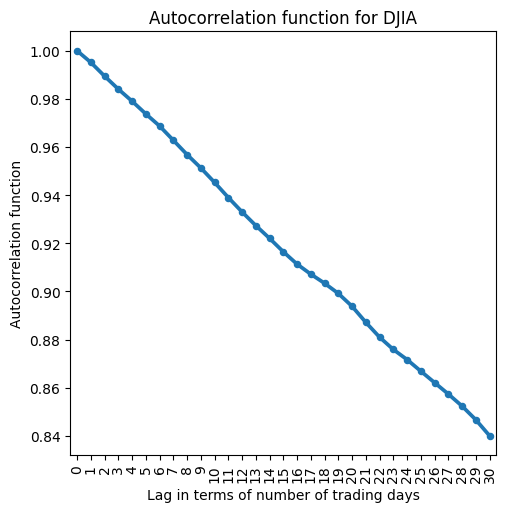

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

djia_df = pd.read_csv('datasets/DJI_HistoricalPrices.csv', index_col=0)
djia_df.index = pd.to_datetime(djia_df.index)
djia_df.columns = djia_df.columns.str.strip()
djia_df = djia_df.iloc[::-1]

lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

plt.figure(figsize=(5.5, 5.5))
g = sns.pointplot(x=lag, y=djia_acf, markers='.')
g.set_title('Autocorrelation function for DJIA')
g.set_xlabel('Lag in terms of number of trading days')
g.set_ylabel('Autocorrelation function')
g.set_xticklabels(lag, rotation=90)


C:\Users\Nero\AppData\Local\Temp\ipykernel_9668\2486502729.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia_df.index = pd.to_datetime(djia_df.index)


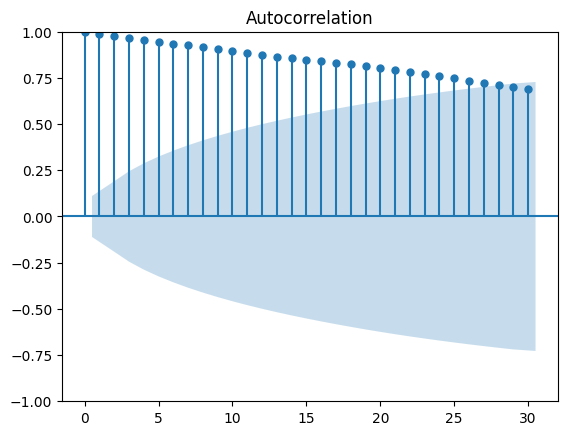

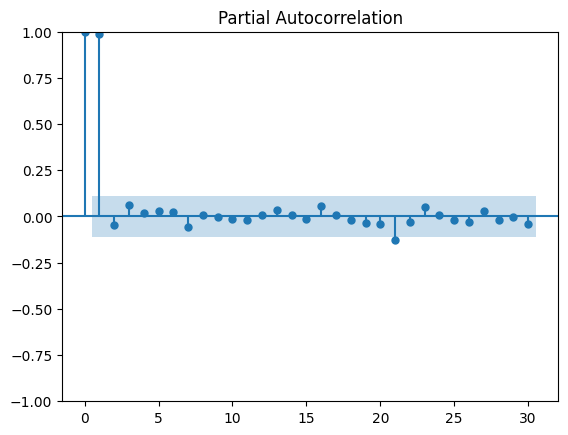

In [25]:
import statsmodels.api as sm
import pandas as pd
from matplotlib import pyplot as plt

djia_df = pd.read_csv('datasets/DJI_HistoricalPrices.csv', index_col=0)
djia_df.index = pd.to_datetime(djia_df.index)
djia_df.columns = djia_df.columns.str.strip()
djia_df = djia_df.iloc[::-1]

sm.graphics.tsa.plot_acf(djia_df['Close'], lags=30)
plt.show()

sm.graphics.tsa.plot_pacf(djia_df['Close'], lags=30)
plt.show()